In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model

In [3]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

# Convert labels to binary: let's classify digit 0 vs. not 0
train_labels = (train_labels == 0).astype(int)
test_labels = (test_labels == 0).astype(int)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Define the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),  # Dropout layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),  # Dropout layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [6]:
# Set up callbacks for early stopping and model checkpointing
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,  # Stop training if val_accuracy doesn't improve for 2 epochs
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,  # Save the model only if val_loss improves
    )
]

In [7]:
# Fit the model with validation set
history = model.fit(
    train_images,
    train_labels,
    epochs=50,  # You can set this higher; early stopping will manage it
    validation_split=0.2,  # Use 20% of the training data for validation
    batch_size=128,
    callbacks=callbacks_list
)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 48s 118ms/step - accuracy: 0.9273 - loss: 0.1724 - val_accuracy: 0.9936 - val_loss: 0.0238
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 115ms/step - accuracy: 0.9879 - loss: 0.0451 - val_accuracy: 0.9949 - val_loss: 0.0158
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 116ms/step - accuracy: 0.9925 - loss: 0.0299 - val_accuracy: 0.9972 - val_loss: 0.0101
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 116ms/step - accuracy: 0.9933 - loss: 0.0234 - val_accuracy: 0.9968 - val_loss: 0.0094
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 116ms/step - accuracy: 0.9948 - loss: 0.0196 - val_accuracy: 0.9983 - val_loss: 0.0070
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 84s 121ms/step - accuracy: 0.9961 - loss: 0.0154 - val_accuracy: 0.9986 - val_loss: 0.0063
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 80s 115ms/step - accuracy: 0.9965 - loss: 0.0126 - val_accuracy: 0.9985 - val_loss: 0.0056
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 114ms/step - accuracy: 0.9960 - loss: 0

In [8]:
# Load the best model
model = load_model("checkpoint_path.keras")

In [9]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9974 - loss: 0.0072
Test accuracy: 0.9978


In [10]:

# Predict new data
predictions = model.predict(test_images)
predicted_classes = (predictions > 0.5).astype("int32")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


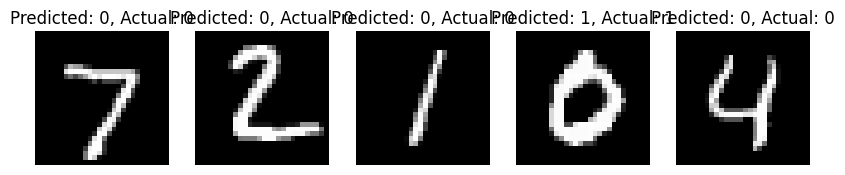

In [11]:
# Display some results
n = 5
plt.figure(figsize=(10, 5))
for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_classes[i][0]}, Actual: {test_labels[i]}')
    plt.axis('off')
plt.show()